In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import seaborn as sns
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder



In [2]:
def random_forest(df):
    f_select=[]
   
    X = df.drop('win',1)
    y = df['win'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    clf = RandomForestClassifier(n_estimators=100)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    proba = clf.predict_proba(X_test)
    proba = np.around(proba, decimals=2)


    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

    # feature importanti per determinarlo
    feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
    print('Feature importance:\n', feature_imp)
    f_selection=feature_imp[(feature_imp>0)]
    print('Feature selection:\n',f_selection)
            
        
    # Creating a bar plot
    sns.barplot(x=f_selection, y=f_selection.index)
    # Add labels to your graph
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.legend()
    plt.show()
    #return X_test, y_test, y_pred, proba


In [3]:
def linear_svm(df):
    X = df.drop('win',1)
    y = df['win'].values


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    svclassifier = SVC(kernel='linear', probability=True)
    svclassifier.fit(X_train, y_train)
    proba = svclassifier.predict_proba(X_test)
    proba = np.around(proba, decimals=2)
    y_pred = svclassifier.predict(X_test)

    print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
    print('Report:\n', classification_report(y_test, y_pred))
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
    print('Proba',proba)

    

In [4]:
def linear_svm1(df):
    X = df.drop('win',1)
    y = df['win'].values


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

    svclassifier =LinearSVC()
    svclassifier.fit(X_train, y_train)
    #proba = svclassifier.predict_proba(X_test)
    #proba = np.around(proba, decimals=2)
    y_pred = svclassifier.predict(X_test)

    print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
    print('Report:\n', classification_report(y_test, y_pred))
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
    #print('Proba',proba)

In [5]:
def boruta(df):
    X = df.drop('win',1)
    y = df['win'].values
    ###initialize Boruta
    forest = RandomForestRegressor(
       n_jobs = -1, 
       max_depth = 5
    )
    boruta = BorutaPy(
       estimator = forest, 
       n_estimators = 'auto',
       max_iter = 100 # number of trials to perform
    )
    ### fit Boruta (it accepts np.array, not pd.DataFrame)
    boruta.fit(np.array(X), np.array(y))
    ### print results
    green_area = X.columns[boruta.support_].to_list()
    blue_area = X.columns[boruta.support_weak_].to_list()
    print('features in the green area:', green_area)
    print('features in the blue area:', blue_area)

In [6]:
def naive_bayes(df):
    X = df.drop('win',1)
    y = df['win'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
    print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
    print('Report:\n', classification_report(y_test, y_pred))
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

In [7]:
df=pd.read_csv('../docs/csv/csvscenarioTest1v1.csv',index_col=0)

In [8]:
c=df.select_dtypes(include='object').columns.tolist()


# Label Encoder


In [9]:
le_df=df
le = preprocessing.LabelEncoder()
le_df[c] = df[c].apply(lambda col: le.fit_transform(col))

In [10]:
le_df

,team_red_Tank1,name_red_Tank1,index_red_Tank1,kind_red_Tank1,move_red_Tank1,load_red_Tank1,hp_red_Tank1,hp_max_red_Tank1,int_atk_red_Tank1,int-def_red_Tank1,...,defense antitankblueTank2,weapon CAblueTank2,weapon ARblueTank2,weapon MGblueTank2,weapon ATblueTank2,weapon MTblueTank2,weapon GRblueTank2,weapon SMblueTank2,weapon SRblueTank2,win
0,0,0,0,2,7,1,1,1,6,0,...,0,8,0,1000000000,0,0,0,2,0,0
1,0,0,0,2,7,1,1,1,6,0,...,0,8,0,1000000000,0,0,0,2,0,0
2,0,0,0,2,7,1,1,1,6,0,...,0,8,0,1000000000,0,0,0,2,0,0
3,0,0,0,2,7,1,1,1,6,0,...,0,8,0,1000000000,0,0,0,2,0,0
4,0,0,0,2,7,1,1,1,6,0,...,0,8,0,1000000000,0,0,0,2,0,0
5,0,0,0,2,7,1,1,1,6,1,...,0,8,0,1000000000,0,0,0,2,0,0
6,0,0,0,2,7,1,1,1,6,1,...,0,8,0,1000000000,0,0,0,2,0,0
7,0,0,0,2,7,1,1,1,6,1,...,0,8,0,1000000000,0,0,0,2,0,0
8,0,0,0,2,7,1,1,1,6,1,...,0,8,0,1000000000,0,0,0,2,0,0
9,0,0,0,2,7,1,1,1,6,1,...,0,8,0,1000000000,0,0,0,2,0,0


# One Hot Encoder

In [11]:
ohe_df=df
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(ohe_df[c]).toarray())
# merge with main df bridge_df on key values
ohe_df = ohe_df.join(enc_df)
ohe_df

,team_red_Tank1,name_red_Tank1,index_red_Tank1,kind_red_Tank1,move_red_Tank1,load_red_Tank1,hp_red_Tank1,hp_max_red_Tank1,int_atk_red_Tank1,int-def_red_Tank1,...,2,3,4,5,6,7,8,9,10,11
0,0,0,0,2,7,1,1,1,6,0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0,0,0,2,7,1,1,1,6,0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0,0,0,2,7,1,1,1,6,0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0,0,0,2,7,1,1,1,6,0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0,0,0,2,7,1,1,1,6,0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
5,0,0,0,2,7,1,1,1,6,1,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
6,0,0,0,2,7,1,1,1,6,1,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
7,0,0,0,2,7,1,1,1,6,1,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
8,0,0,0,2,7,1,1,1,6,1,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
9,0,0,0,2,7,1,1,1,6,1,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


# Dummies

In [12]:
bridge_df=df
X = pd.get_dummies(bridge_df, prefix_sep='_', drop_first=True)
bridge_df = bridge_df.merge(X)
bridge_df

,team_red_Tank1,name_red_Tank1,index_red_Tank1,kind_red_Tank1,move_red_Tank1,load_red_Tank1,hp_red_Tank1,hp_max_red_Tank1,int_atk_red_Tank1,int-def_red_Tank1,...,defense antitankblueTank2,weapon CAblueTank2,weapon ARblueTank2,weapon MGblueTank2,weapon ATblueTank2,weapon MTblueTank2,weapon GRblueTank2,weapon SMblueTank2,weapon SRblueTank2,win
0,0,0,0,2,7,1,1,1,6,0,...,0,8,0,1000000000,0,0,0,2,0,0
1,0,0,0,2,7,1,1,1,6,0,...,0,8,0,1000000000,0,0,0,2,0,0
2,0,0,0,2,7,1,1,1,6,0,...,0,8,0,1000000000,0,0,0,2,0,0
3,0,0,0,2,7,1,1,1,6,0,...,0,8,0,1000000000,0,0,0,2,0,0
4,0,0,0,2,7,1,1,1,6,0,...,0,8,0,1000000000,0,0,0,2,0,0
5,0,0,0,2,7,1,1,1,6,0,...,0,8,0,1000000000,0,0,0,2,0,0
6,0,0,0,2,7,1,1,1,6,0,...,0,8,0,1000000000,0,0,0,2,0,0
7,0,0,0,2,7,1,1,1,6,0,...,0,8,0,1000000000,0,0,0,2,0,0
8,0,0,0,2,7,1,1,1,6,0,...,0,8,0,1000000000,0,0,0,2,0,0
9,0,0,0,2,7,1,1,1,6,0,...,0,8,0,1000000000,0,0,0,2,0,0


In [13]:
X

,team_red_Tank1,name_red_Tank1,index_red_Tank1,kind_red_Tank1,move_red_Tank1,load_red_Tank1,hp_red_Tank1,hp_max_red_Tank1,int_atk_red_Tank1,int-def_red_Tank1,...,defense antitankblueTank2,weapon CAblueTank2,weapon ARblueTank2,weapon MGblueTank2,weapon ATblueTank2,weapon MTblueTank2,weapon GRblueTank2,weapon SMblueTank2,weapon SRblueTank2,win
0,0,0,0,2,7,1,1,1,6,0,...,0,8,0,1000000000,0,0,0,2,0,0
1,0,0,0,2,7,1,1,1,6,0,...,0,8,0,1000000000,0,0,0,2,0,0
2,0,0,0,2,7,1,1,1,6,0,...,0,8,0,1000000000,0,0,0,2,0,0
3,0,0,0,2,7,1,1,1,6,0,...,0,8,0,1000000000,0,0,0,2,0,0
4,0,0,0,2,7,1,1,1,6,0,...,0,8,0,1000000000,0,0,0,2,0,0
5,0,0,0,2,7,1,1,1,6,1,...,0,8,0,1000000000,0,0,0,2,0,0
6,0,0,0,2,7,1,1,1,6,1,...,0,8,0,1000000000,0,0,0,2,0,0
7,0,0,0,2,7,1,1,1,6,1,...,0,8,0,1000000000,0,0,0,2,0,0
8,0,0,0,2,7,1,1,1,6,1,...,0,8,0,1000000000,0,0,0,2,0,0
9,0,0,0,2,7,1,1,1,6,1,...,0,8,0,1000000000,0,0,0,2,0,0


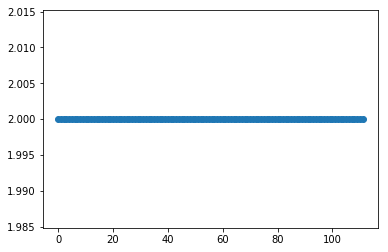

In [16]:
plt.scatter(df.index,df['kind_red_Tank1'])

In [ ]:
random_forest(df)

In [ ]:
boruta(df)

linear_svm(df)

In [ ]:
linear_svm1(df)

In [ ]:
naive_bayes(df)

In [ ]:
linear_svm(df)

In [ ]:
c.values

In [ ]:
from sklearn.pipeline import Pipeline


In [ ]:
ohe=OneHotEncoder()

In [ ]:
categorical_pipe = Pipeline([ ('ohe', ohe)])


In [ ]:
col_transformer = ColumnTransformer(
                    transformers=[
                        ('cats', categorical_pipe, c.values)
                    ],
                    remainder='drop',
                    n_jobs=-1
                    )

In [ ]:
d=col_transformer.fit_transform(df)